# Importing Dataset

In [103]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("../input"))


/kaggle/input/earthquake/all_month.csv
['earthquake']


In [104]:
data = pd.read_csv("/kaggle/input/earthquake/all_month.csv")
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-02-12T02:00:48.070Z,38.830666,-122.805000,1.42,1.19,md,19.0,61.0,0.008271,0.04,...,2022-02-12T02:02:21.769Z,"7km W of Cobb, CA",earthquake,0.20,0.49,0.31,5.0,automatic,nc,nc
1,2022-02-12T02:00:08.011Z,63.018300,-149.952300,87.70,1.60,ml,NaN,NaN,NaN,0.99,...,2022-02-12T02:03:44.150Z,"63 km N of Chase, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak
2,2022-02-12T01:44:05.758Z,62.348200,-149.136000,0.00,1.90,ml,NaN,NaN,NaN,0.49,...,2022-02-12T01:48:32.600Z,"42 km ENE of Susitna North, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2022-02-12T01:43:09.170Z,38.832501,-122.790337,1.74,0.85,md,7.0,94.0,0.005900,0.01,...,2022-02-12T01:52:10.584Z,"6km WNW of Cobb, CA",earthquake,0.64,1.87,NaN,1.0,automatic,nc,nc
4,2022-02-12T01:19:46.000Z,64.174600,-150.001900,0.00,1.60,ml,NaN,NaN,NaN,0.65,...,2022-02-12T01:28:40.412Z,"40 km WSW of Clear, Alaska, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak


In [105]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

# Data Preprocessing

In [106]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10462.000000,10462.000000,10462.000000,10461.000000,7758.000000,8947.000000,7218.000000,10462.000000,7798.000000,10462.000000,8401.000000,8937.000000
mean,35.625169,-109.102912,20.860002,1.619446,19.847641,125.022313,0.651476,0.258147,1.739319,2.670639,0.273303,13.433367
std,19.445014,70.242018,50.055162,1.255867,15.831025,69.398026,2.153796,0.277273,3.086700,24.692907,0.512877,25.046123
min,-63.521900,-179.998200,-3.500000,-1.490000,0.000000,13.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,33.337375,-150.024175,3.200000,0.810000,9.000000,73.000000,0.020000,0.090000,0.280000,0.480000,0.102000,4.000000
50%,37.789667,-119.812617,8.200000,1.390000,15.000000,108.000000,0.059000,0.140000,0.470000,0.800000,0.160000,7.000000
75%,44.670792,-115.987817,15.400000,2.070000,26.000000,159.000000,0.148453,0.330000,1.030000,1.800000,0.240000,15.000000
max,85.309300,179.949800,644.770000,6.600000,184.000000,352.000000,43.133000,2.980000,23.700000,1865.600000,5.350000,618.000000


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10462 non-null  object 
 1   latitude         10462 non-null  float64
 2   longitude        10462 non-null  float64
 3   depth            10462 non-null  float64
 4   mag              10461 non-null  float64
 5   magType          10461 non-null  object 
 6   nst              7758 non-null   float64
 7   gap              8947 non-null   float64
 8   dmin             7218 non-null   float64
 9   rms              10462 non-null  float64
 10  net              10462 non-null  object 
 11  id               10462 non-null  object 
 12  updated          10462 non-null  object 
 13  place            10462 non-null  object 
 14  type             10462 non-null  object 
 15  horizontalError  7798 non-null   float64
 16  depthError       10462 non-null  float64
 17  magError    

 We can see that there are some null values

In [108]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2704
gap                1515
dmin               3244
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2664
depthError            0
magError           2061
magNst             1525
status                0
locationSource        0
magSource             0
dtype: int64

In [109]:
data.shape

(10462, 22)

In [110]:
round(data.isnull().sum()*100 /len(data), 2)

time                0.00
latitude            0.00
longitude           0.00
depth               0.00
mag                 0.01
magType             0.01
nst                25.85
gap                14.48
dmin               31.01
rms                 0.00
net                 0.00
id                  0.00
updated             0.00
place               0.00
type                0.00
horizontalError    25.46
depthError          0.00
magError           19.70
magNst             14.58
status              0.00
locationSource      0.00
magSource           0.00
dtype: float64

As we can see that mag, magtype, nst, gap, dmin, horizontalError, magNst, magError have a lot of null values. Hence, we are replacing these values with mean, except for magType which has str dtype

In [111]:
data['magType'].value_counts()

ml       5907
md       3488
mb        922
mww        94
mwr        22
mb_lg      12
mh          8
mw          7
ms_20       1
Name: magType, dtype: int64

Since, magType has maximum 'ml', we will replace nan with 'ml'

# Replacing null values

In [112]:
nst_mean = data['nst'].mean()
data['nst'].fillna(value = nst_mean, inplace = True)

mag_mean = data['mag'].mean()
data['mag'].fillna(value = mag_mean, inplace = True)

gap_mean = data['gap'].mean()
data['gap'].fillna(value = gap_mean, inplace = True)

horizontalError_mean = data['horizontalError'].mean()
data['horizontalError'].fillna(value = horizontalError_mean, inplace = True)

magError_mean = data['magError'].mean()
data['magError'].fillna(value = magError_mean, inplace = True)

magNst_mean = data['magNst'].mean()
data['magNst'].fillna(value = magNst_mean, inplace = True)

dmin_mean = data['dmin'].mean()
data['dmin'].fillna(value = dmin_mean, inplace = True)

data['magType'].fillna('ml', inplace = True)

In [113]:
data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

# Checking the Correlation

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [115]:
# Changing the format of time

timestamp_arr = []
for d in data["time"]:
    date_format = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
    timestamp_arr.append(datetime.datetime.timestamp(date_format))


In [116]:
timestamp = pd.Series(timestamp_arr)
data['timestamp'] = timestamp.values
data["timestamp"].head()

0    1.644631e+09
1    1.644631e+09
2    1.644630e+09
3    1.644630e+09
4    1.644629e+09
Name: timestamp, dtype: float64

<AxesSubplot:>

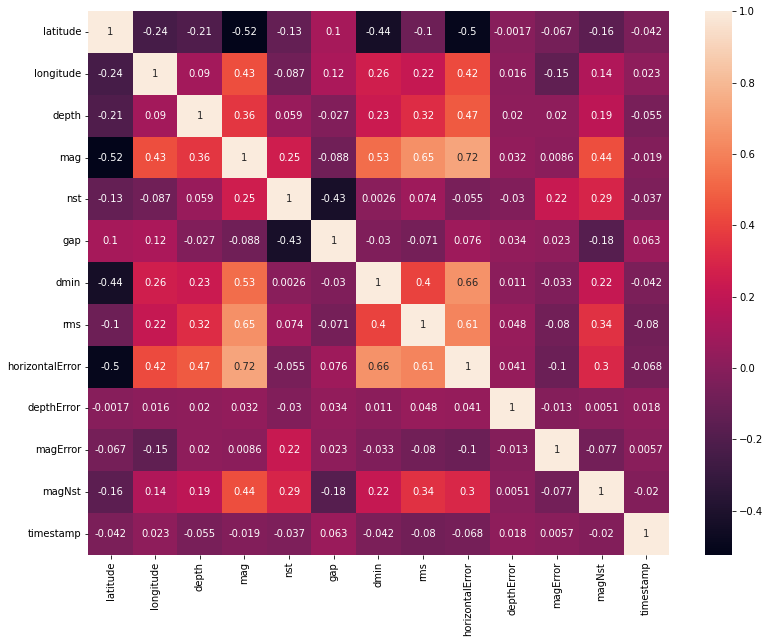

In [117]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), annot = True)

1. Our dependent variables are mag and depth.
2. With mag, latitude has high negative correlation while longitude, dmin, rms, horizontalError and magNst have high positive correlation
3. Moreover, after researching, we found out that horizontalError, rms, dmin is also not required for our model. Moreover, they are causing multi-collinearity. Hence it would be better to remove them.


# Dropping Columns

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10462 non-null  object 
 1   latitude         10462 non-null  float64
 2   longitude        10462 non-null  float64
 3   depth            10462 non-null  float64
 4   mag              10462 non-null  float64
 5   magType          10462 non-null  object 
 6   nst              10462 non-null  float64
 7   gap              10462 non-null  float64
 8   dmin             10462 non-null  float64
 9   rms              10462 non-null  float64
 10  net              10462 non-null  object 
 11  id               10462 non-null  object 
 12  updated          10462 non-null  object 
 13  place            10462 non-null  object 
 14  type             10462 non-null  object 
 15  horizontalError  10462 non-null  float64
 16  depthError       10462 non-null  float64
 17  magError    

1. First we will drop columns that have dtype object. This includes time, magType, net, id, updated, place, type, status, magSource, locationSource.
2. Next, as observed in the heatmap, we can drop the columns that have low correlation. This includes magError, depthError, gap, nst, magnst, timestamp.
3. Moreover, after researching, we found out that horizontalError, rms, dmin is also not required for our model.

Hence in the end we are only left with longitude and latitude as our independent variables and depth and mag as dependent variables.

In [119]:
data = data[['latitude', 'longitude', 'depth', 'mag']]
data.head()

,latitude,longitude,depth,mag
0,38.830666,-122.805000,1.42,1.19
1,63.018300,-149.952300,87.70,1.60
2,62.348200,-149.136000,0.00,1.90
3,38.832501,-122.790337,1.74,0.85
4,64.174600,-150.001900,0.00,1.60


# Checking for Outliers

<AxesSubplot:xlabel='latitude', ylabel='mag'>

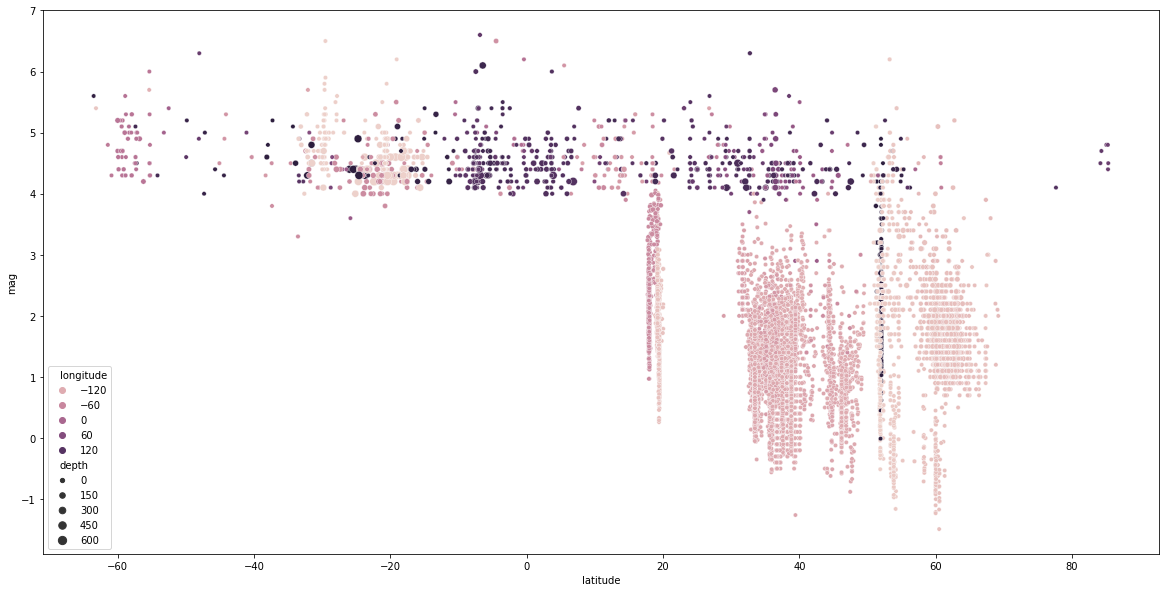

In [120]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="latitude", y="mag", hue = 'longitude', size = 'depth')

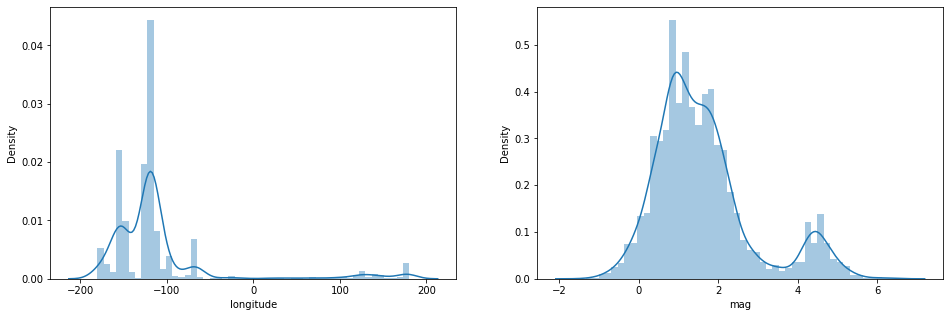

In [121]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['longitude'])
plt.subplot(1,2,2)
sns.distplot(data['mag'])
plt.show()

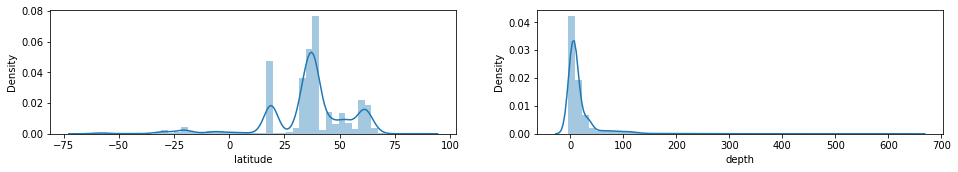

In [122]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(data['latitude'])
plt.subplot(2,2,2)
sns.distplot(data['depth'])
plt.show()

<AxesSubplot:xlabel='longitude'>

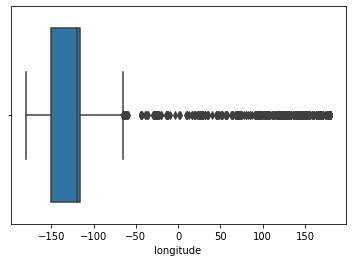

In [123]:
# Plotting a box plot for skewed features
sns.boxplot(data['longitude'])

<AxesSubplot:xlabel='latitude'>

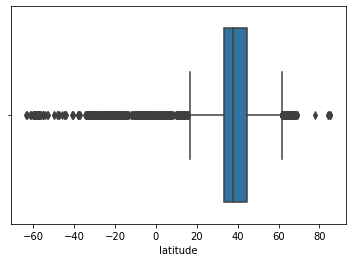

In [124]:
sns.boxplot(data['latitude'])

<AxesSubplot:xlabel='depth'>

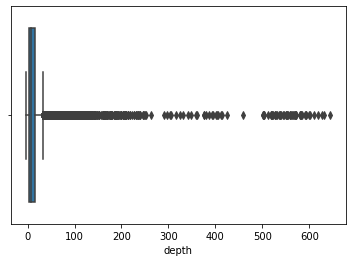

In [125]:
sns.boxplot(data['depth'])

In [126]:
percentile25_mag = data['mag'].quantile(0.25)
percentile75_mag = data['mag'].quantile(0.75)

In [127]:
percentile25_depth = data['depth'].quantile(0.25)
percentile75_depth = data['depth'].quantile(0.75)

In [128]:
iqr_mag = percentile75_mag - percentile25_mag
upper_limit_mag = percentile75_mag + 1.5 * iqr_mag
lower_limit_mag = percentile25_mag - 1.5 * iqr_mag

In [129]:
iqr_depth = percentile75_depth - percentile25_depth
upper_limit_depth = percentile75_depth + 1.5 * iqr_depth
lower_limit_depth = percentile25_depth - 1.5 * iqr_depth

In [130]:
data[data['mag'] > upper_limit_mag]
data[data['mag'] < lower_limit_mag]

,latitude,longitude,depth,mag
1227,60.505667,-152.793500,3.78,-1.49
1351,60.001667,-153.095500,1.37,-1.21
3671,59.990500,-153.072833,1.71,-1.10
4674,54.122667,-165.948167,2.70,-1.16
6543,60.497000,-152.716500,-2.67,-1.17
9422,59.993667,-153.058333,3.02,-1.23
9936,39.421833,-110.312333,-1.52,-1.26


In [131]:
data[data['depth'] > upper_limit_depth]
data[data['depth'] < lower_limit_depth]

,latitude,longitude,depth,mag


In [132]:
new_df = data[data['mag'] < upper_limit_mag]
new_df.shape

(9434, 4)

In [133]:
# new_data = new_df[new_df['depth'] < upper_limit_depth]
# new_data.shape

In [134]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(data['depth'])
# plt.subplot(2,2,2)
# sns.boxplot(data['depth'])
# plt.subplot(2,2,3)
# sns.distplot(new_df['depth'])
# plt.subplot(2,2,4)
# sns.boxplot(new_df['depth'])
# plt.show()

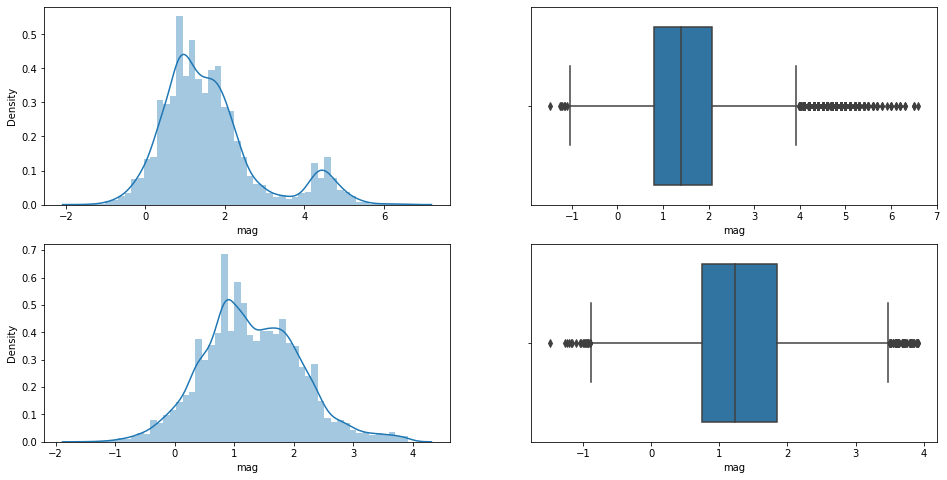

In [135]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['mag'])
plt.subplot(2,2,2)
sns.boxplot(data['mag'])
plt.subplot(2,2,3)
sns.distplot(new_df['mag'])
plt.subplot(2,2,4)
sns.boxplot(new_df['mag'])
plt.show()

In [136]:
# # Capping
# new_df_cap = data.copy()
# new_df_cap['depth'] = np.where(
#     new_df_cap['depth'] > upper_limit_depth,
#     upper_limit_depth,
#     np.where(
#         new_df_cap['depth'] < lower_limit_depth,
#         lower_limit_depth,
#         new_df_cap['depth']
#     )
# )

In [137]:
new_df_cap = data.copy()
new_df_cap['mag'] = np.where(
    new_df_cap['mag'] > upper_limit_depth,
    upper_limit_depth,
    np.where(
        new_df_cap['mag'] < lower_limit_depth,
        lower_limit_depth,
        new_df_cap['mag']
    )
)

In [138]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(data['depth'])
# plt.subplot(2,2,2)
# sns.boxplot(data['depth'])
# plt.subplot(2,2,3)
# sns.distplot(new_df_cap['depth'])
# plt.subplot(2,2,4)
# sns.boxplot(new_df_cap['depth'])
# plt.show()

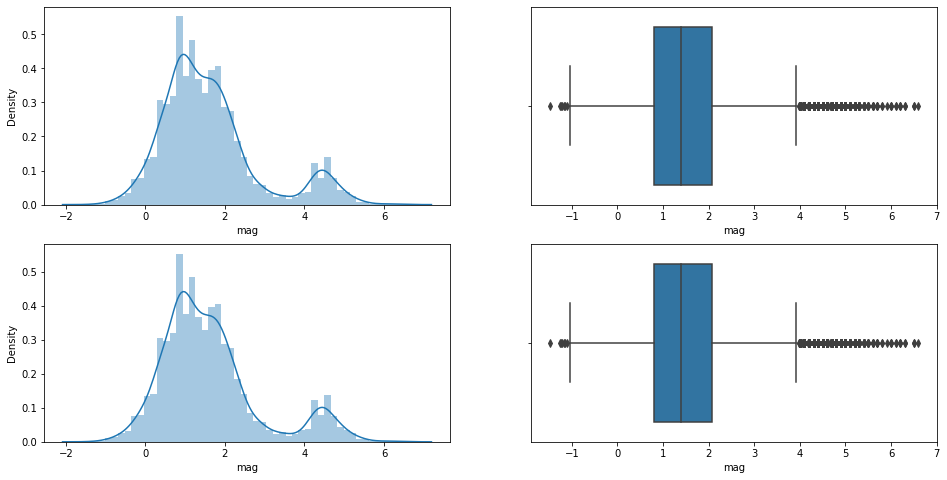

In [139]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['mag'])
plt.subplot(2,2,2)
sns.boxplot(data['mag'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['mag'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['mag'])
plt.show()

In [140]:
# new df is not used
X = data[['latitude', 'longitude']]
y = data[['mag', 'depth']]

<AxesSubplot:>

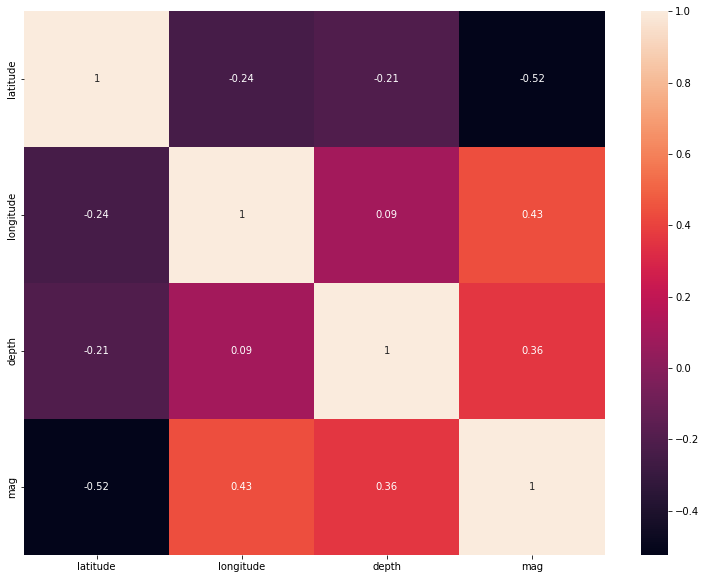

In [154]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), annot = True)

In [141]:
print(X.shape, y.shape)

(10462, 2) (10462, 2)


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)


(8369, 2) (2093, 2) (8369, 2) (2093, 2)


In [143]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

reg1.score(X_test, y_test)

0.21563323599267203

In [144]:
from sklearn.linear_model import Ridge

reg2 = Ridge()
reg2.fit(X_train, y_train)

reg2.score(X_test, y_test)

0.21563323281195873

In [145]:
from sklearn.linear_model import Lasso

reg3 = Lasso()
reg3.fit(X_train, y_train)

reg3.score(X_test, y_test)

0.21505607424744272

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polyreg=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg.fit(X_train,y_train)

polyreg.score(X_test, y_test)

0.44154258145648484

In [147]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(random_state = 420)
dtreg.fit(X_train, y_train)

dtreg.score(X_test, y_test)

0.7325283796164483

In [148]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(random_state = 420)
rfreg.fit(X_train, y_train)

rfreg.score(X_test, y_test)

0.8383688890300641

In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(rfreg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[ 1.01905,  6.52465],
       [ 0.83935, 16.16545],
       [ 4.3544 , 90.4931 ],
       ...,
       [ 4.607  , 36.3217 ],
       [ 0.6521 , 16.37495],
       [ 0.6992 , 14.09985]])

In [150]:
best_fit.score(X_test, y_test)

0.8415907121576152

In [151]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor()
knnreg.fit(X_train, y_train)

knnreg.score(X_test, y_test)

0.8391831975993558

In [152]:
import pickle

filename = 'Earthquake_predictor.pkl'
pickle.dump(rfreg, open(filename, 'wb'))